# SLS(Sewage Lifting Station)-05 of Jalshiri Abashon Project

### imporing necessary packages

In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

### filter out the warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

### read the shape file for conduit

In [3]:
conduits = gpd.read_file("SLS05/Conduit05.shp")
conduits.shape

(1483, 12)

In [4]:
conduits.columns

Index(['D', 'FLOW', 'ID', 'INV_STRT', 'INV_STP', 'LABEL', 'L', 'SLOP_M/KM',
       'STRT_NODE', 'SOP_NODE', 'VEL_AVE', 'geometry'],
      dtype='object')

### See the first five rows of the attribute table for conduits

In [5]:
conduits.head()

,D,FLOW,ID,INV_STRT,INV_STP,LABEL,L,SLOP_M/KM,STRT_NODE,SOP_NODE,VEL_AVE,geometry
0,200.0,1.522,14358,4.32,4.27,CJAS5-1,11.9,4.500,MJAS5-299,MJAS5-300,0.40,"LINESTRING (552813.430 631292.778, 552814.130 ..."
1,200.0,2.183,14362,6.31,6.25,CJAS5-2,13.3,4.000,MJAS5-1140,MJAS5-1087,0.43,"LINESTRING (552269.200 632139.036, 552255.871 ..."
2,200.0,-1.000,14368,5.76,4.57,CJAS5-3,14.7,80.811,MJAS5-830,MJAS5-821,-1.00,"LINESTRING (553182.342 631809.511, 553181.474 ..."
3,200.0,1.203,14378,6.37,6.31,CJAS5-4,15.3,4.500,MJAS5-1308,MJAS5-1140,0.37,"LINESTRING (552280.396 632128.546, 552269.200 ..."
4,200.0,0.481,14381,4.57,4.50,CJAS5-5,15.5,4.500,MJAS5-820,MJAS5-821,0.28,"LINESTRING (553170.848 631783.485, 553171.095 ..."


#### find missing value

In [6]:
conduits.isna().sum()

D            0
FLOW         0
ID           0
INV_STRT     0
INV_STP      0
LABEL        0
L            0
SLOP_M/KM    0
STRT_NODE    0
SOP_NODE     0
VEL_AVE      0
geometry     0
dtype: int64

#### Data types for every column

In [10]:
conduits.dtypes

D             float64
FLOW          float64
ID              int64
INV_STRT      float64
INV_STP       float64
LABEL          object
L             float64
SLOP_M/KM     float64
STRT_NODE      object
SOP_NODE       object
VEL_AVE       float64
geometry     geometry
dtype: object

In [11]:
conduits.describe()

,D,FLOW,ID,INV_STRT,INV_STP,L,SLOP_M/KM,VEL_AVE
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,207.805125,5.164388,19883.778827,4.873817,4.734059,29.334457,4.792792,0.276932
std,38.333897,10.468477,11876.045800,0.920578,0.908011,4.086983,4.726395,0.347389
min,200.000000,-1.000000,14358.000000,2.530000,2.500000,9.200000,0.483000,-1.000000
25%,200.000000,0.491000,15799.500000,4.230000,4.100000,30.000000,4.500000,0.220000
50%,200.000000,1.479000,16951.000000,4.820000,4.680000,30.000000,4.500000,0.350000
75%,200.000000,5.180000,18404.500000,5.555000,5.390000,30.000000,4.500000,0.450000
max,525.000000,149.117000,65371.000000,6.800000,6.680000,49.800000,80.811000,0.800000


##### obseravtion:

- Conduit dia: $minimum = 200mm$ and $ maximum = 525mm $
- maximum flow = 149.117

### find unique dia conduits

In [14]:
np.unique(conduits["D"])

array([200., 250., 300., 450., 525.])

### see the number of conduits for each type

In [19]:
conduits["D"].value_counts()

200.0    1397
250.0      35
450.0      30
300.0      20
525.0       1
Name: D, dtype: int64

### read the shape file for manholes

In [7]:
manholes = gpd.read_file("SLS05/Manhole05.shp")
manholes.shape

(1407, 13)

In [30]:
manholes.head()

,DEPTH_OUT,SUMP_DPTH,ELEV_GND,ELEV_INV,FLOWINTOT,FLOWOUTTOT,MAX_HGL,HGL_IN,HGL_OUT,ID,LABEL,VEL_OUT,geometry
0,0.35,0.3,8.0,4.51,2.647,2.647,4.86,4.86,4.86,9577,MJAS5-1,0.47,POINT (552396.744 630204.977)
1,0.35,0.3,8.0,4.38,2.647,2.647,4.73,4.73,4.73,9578,MJAS5-2,0.47,POINT (552424.214 630192.920)
2,0.35,0.3,8.0,4.24,2.647,2.647,4.59,4.59,4.59,9579,MJAS5-3,0.47,POINT (552442.542 630205.802)
3,0.34,0.3,8.0,4.65,2.166,2.166,4.99,4.99,4.99,9580,MJAS5-4,0.45,POINT (552369.924 630218.403)
4,0.37,0.3,8.0,4.09,5.414,5.414,4.46,4.46,4.46,9581,MJAS5-5,0.58,POINT (552457.770 630236.968)


In [31]:
manholes.describe()

,DEPTH_OUT,SUMP_DPTH,ELEV_GND,ELEV_INV,FLOWINTOT,FLOWOUTTOT,MAX_HGL,HGL_IN,HGL_OUT,ID,VEL_OUT
count,1407.000000,1.407000e+03,1407.0,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,0.481507,3.000000e-01,8.0,4.544435,5.497361,5.497361,5.026141,5.026141,5.026141,12780.318408,0.327264
std,0.273387,7.274546e-15,0.0,0.914792,10.646490,10.646490,0.731953,0.731953,0.731953,10595.581786,0.188559
min,0.300000,3.000000e-01,8.0,2.230000,0.000000,0.000000,4.010000,4.010000,4.010000,9577.000000,0.000000
25%,0.320000,3.000000e-01,8.0,3.900000,0.722000,0.722000,4.425000,4.425000,4.425000,9948.500000,0.210000
50%,0.350000,3.000000e-01,8.0,4.500000,1.684000,1.684000,4.850000,4.850000,4.850000,10335.000000,0.350000
75%,0.520000,3.000000e-01,8.0,5.205000,5.646500,5.646500,5.535000,5.535000,5.535000,10712.500000,0.450000
max,1.790000,3.000000e-01,8.0,6.500000,149.117000,149.117000,6.830000,6.830000,6.830000,65369.000000,0.800000


### plot the shape files data

In [8]:
def pltcolor(dia):
    cols=[]
    
    for val in dia:
        if int(val) == 200:
            cols.append('black')
        elif int(val) == 250:
            cols.append('m')
        elif int(val) == 300:
            cols.append('g')
        elif int(val) == 450:
            cols.append('b')
        else:
            cols.append('maroon')
    
    return cols

# Create the colors list using the function above
cols= pltcolor(conduits["D"])

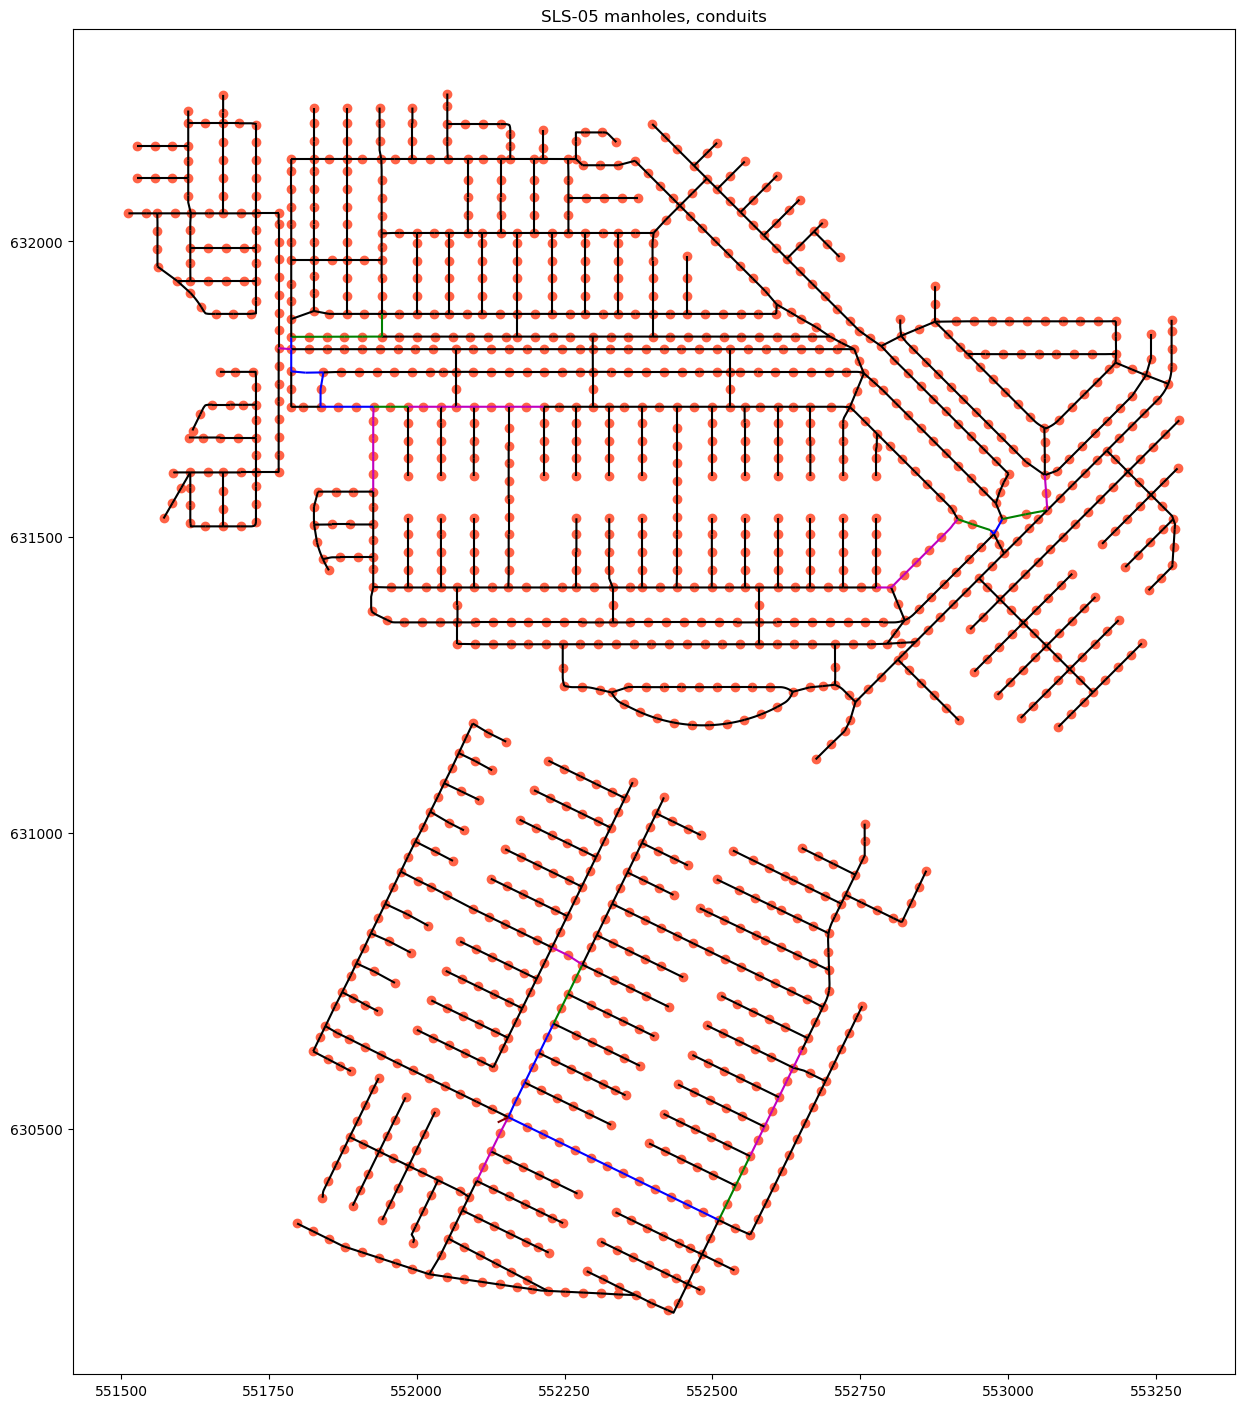

In [11]:
fig, ax = plt.subplots(figsize=(15,20))

conduits.plot(ax=ax, color=cols)
manholes.plot(ax=ax, color="tomato")
plt.title(label="SLS-05 manholes, conduits")
plt.show()

In [12]:
outfalls = gpd.read_file("SLS05/Outfall05.shp")
outfalls.shape

(3, 17)

In [53]:
outfalls

,B_ID,BOUNDCOND,BNDYIDID,BNDYID,ELEV_GND,ELEV_INV,TAILWATER,FLOWOUTTOT,HGL,ID,LABEL,LOSTCA,NOTES,RIM=GRND?,SYSTEMCA,TIDAL_GATE,geometry
0,0,Free Outfall,0,None,8.0,3.0,0.0,510.862,3.80,64498,O-1,NaN,None,T,NaN,F,POINT (552965.290 631517.116)
1,0,Free Outfall,0,None,8.0,3.0,0.0,327.751,3.15,64505,O-2,NaN,None,T,NaN,F,POINT (552133.685 630512.020)
2,0,Free Outfall,0,None,8.0,3.0,0.0,294.233,3.15,64674,O-3,NaN,None,T,NaN,F,POINT (551820.439 631783.616)


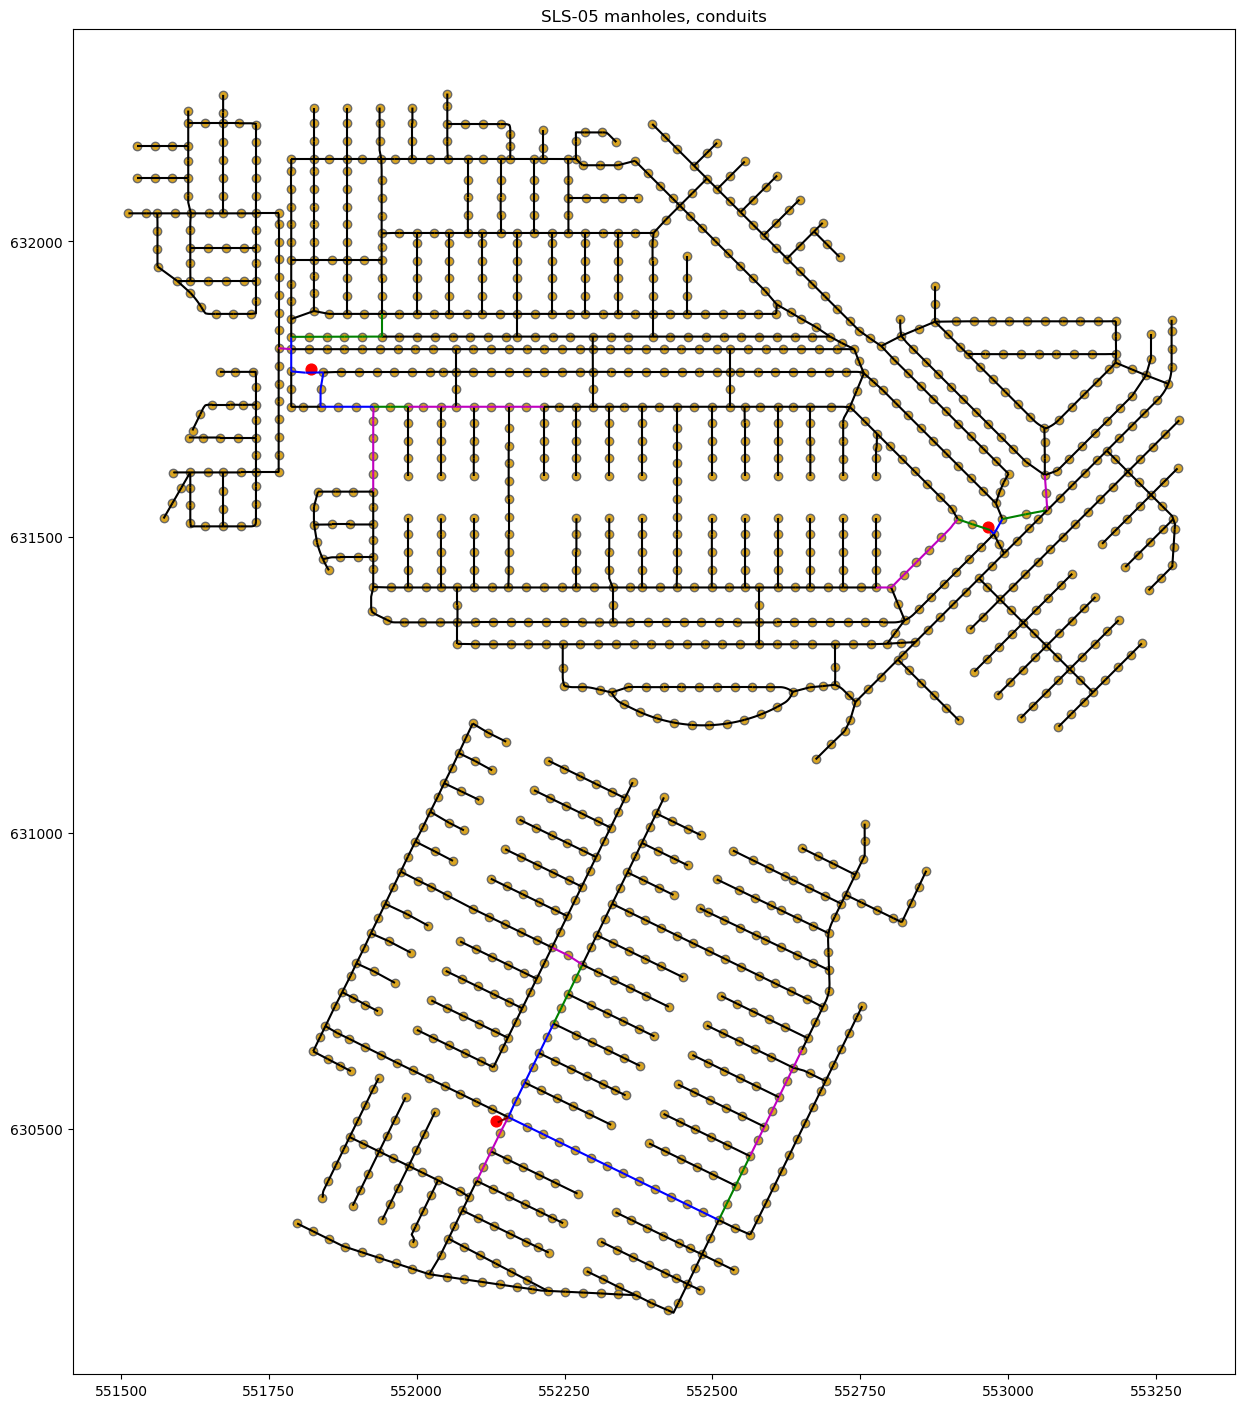

In [22]:
fig, ax = plt.subplots(figsize=(15,20))

conduits.plot(ax=ax, color=cols)
manholes.plot(ax=ax, color="goldenrod", edgecolor="dimgray")
outfalls.plot(ax=ax, color="red", markersize=60)
plt.title(label="SLS-05 manholes, conduits")
plt.show()

### check out the co-ordinate system

CRS(Coordinate Reference System)

In [60]:
conduits.crs

{}

In [62]:
conduits.crs = "EPSG:3106"

In [63]:
conduits.crs

'EPSG:3106'